In [155]:
%%time

import pandas as pd
import numpy as np

# Random seed for reproducibility
SEED = 123
# A file to save global variables
global_variables = pd.DataFrame({'SEED': [SEED]})
global_variables.to_csv('global_variables.csv')
global_variables.to_csv('functions/global_variables.csv')

train_unprocessed = pd.read_csv('datasets/train.csv', index_col='ID_LAT_LON_YEAR_WEEK')
test_unprocessed = pd.read_csv('datasets/test.csv', index_col='ID_LAT_LON_YEAR_WEEK')

train_unprocessed.head()

CPU times: total: 875 ms
Wall time: 919 ms


,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [156]:
train_unprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  79023 non-null  float64
 1   longitude                                                 79023 non-null  float64
 2   year                                                      79023 non-null  int64  
 3   week_no                                                   79023 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 7   SulphurDioxide_cloud_fraction                             64414 no

## 00. Baseline

First, we'll make a baseline prediction, that all emissions are equal to the median emission of the training set. We'll calculate the Score of this prediction on the training set (for future cases, we'll calculate separately Train Score and Cross-validation Score).

Here is what we'll use to compare performances of our models:

Cross-val Score = (Average Cross-validation RMSE) + (1 Standard deviation of Cross-validation RMSE).

(we want to minimize this Score).

Score for this case will be just Train RMSE.

We'll save our intermediate results in DataFrame scores_df:

In [157]:
from sklearn.metrics import mean_squared_error

train_predictions_00 = pd.DataFrame([train_unprocessed['emission'].median()] * len(train_unprocessed), columns=['emission'])

scores_df = pd.DataFrame({'Comment': [], 'Train Score': [], 'Cross-val Score': [], 'Test RMSE': []})

score_00 = mean_squared_error(train_unprocessed['emission'], train_predictions_00['emission'], squared=False) - 0

scores_df.loc[0, 'Comment'] = 'Just average'
scores_df.loc[0, 'Train Score'] = score_00
scores_df.loc[0, 'Cross-val Score'] = np.nan
scores_df

,Comment,Train Score,Cross-val Score,Test RMSE
0,Just average,148.806038,NaN,NaN


Now, we'll make a submission to Kaggle to see our Test RMSE. We won't use Test RMSE in making decisions, since we don't want to overfit to the visible testing data (unvisible part of the testing data will be used in calculating the final competition score) but we'll use Test RMSE to catch bugs in our Score calculations:

In [158]:
test_predictions_00 = pd.DataFrame([train_predictions_00['emission'].median()] * len(test_unprocessed), columns=['emission'])
submission_00 = pd.concat([pd.DataFrame(test_unprocessed.index, columns=['ID_LAT_LON_YEAR_WEEK']), test_predictions_00], axis=1)

submission_00.to_csv('submissions/submission_00.csv', index=False)

scores_df.loc[0, 'Test RMSE'] = 169.19374
scores_df.to_csv('scores_df.csv')
scores_df

,Comment,Train Score,Cross-val Score,Test RMSE
0,Just average,148.806038,NaN,169.19374


## Choosing number of cross-validation splits

We'll use LightGBM with n_estimators=10 as our first estimator. It is fast, efficient, doesn't require normalization and can handle missing values. Increasing n_estimators will improve performance, 

For calculating Score, I wrote get_score function, that is located in ['functions/get_score.py'](functions/get_score.py). This function takes a number of TimeSeriesSplit slits as one of its arguments. 

We want such number of splits that give us the best balance between bias and variance. For the sake of run time, the optimal number of splits calculation is done in a separate file: ['functions/n_splits.py'](functions/n_splits.py). We'll calculate scores among several different random states (all depend on the SEED, chosen at the beginning of this file).

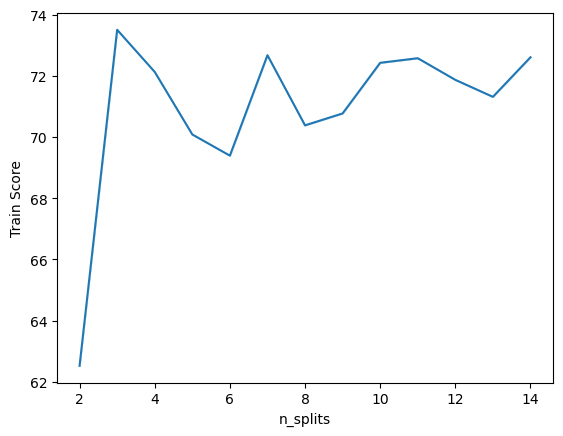

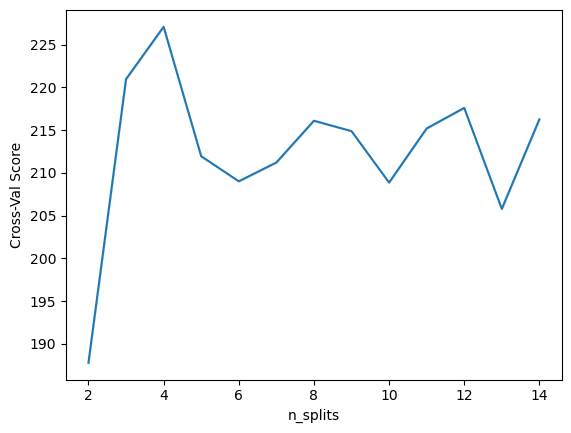

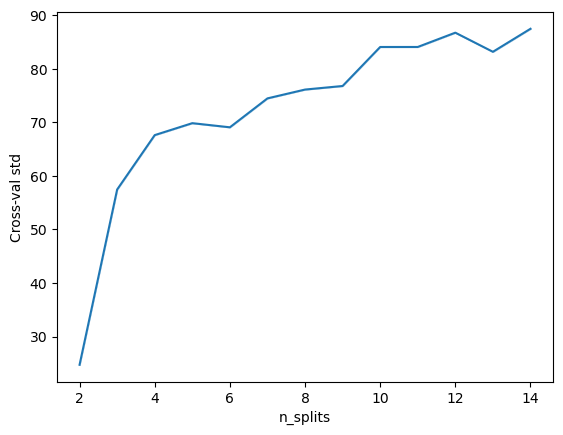

In [159]:
tradeoff = pd.read_csv('functions/tradeoff.csv', index_col=0)

import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=tradeoff, x='n_splits', y='Train Score')
plt.show()
sns.lineplot(data=tradeoff, x='n_splits', y='Cross-Val Score')
plt.show()
sns.lineplot(data=tradeoff, x='n_splits', y='Cross-val std')
plt.show()


We'll use 4 splits, for a good balance between bias, variance and execution time:

In [160]:
N_SPLITS = 4
global_variables['N_SPLITS'] = N_SPLITS
global_variables.to_csv('global_variables.csv')
global_variables.to_csv('functions/global_variables.csv')

## 01. LightGBM on unprocessed data

Let's find Scores and Test RMSE for this number of splits:

In [161]:
%%time

# UNCOMMENT TO INSTALL LightGBM
#!pip install lightgbm
import lightgbm as lgb

study_number = '01'

# Instantiate the estimator
model = lgb.LGBMRegressor(random_state=SEED, n_jobs=-1, n_estimators=10)

#Calculate scores
from functions.get_score import get_score

train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_unprocessed, test_unprocessed, model, scores_df,
                                                                  comment="LightGBM on unprocessed data")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 14.8 s
Wall time: 1.96 s


In [162]:
scores_df.loc[int(study_number), 'Test RMSE'] = 92.71815
scores_df.to_csv('scores_df.csv')
scores_df

,Comment,Train Score,Cross-val Score,Test RMSE
0,Just average,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,72.130730,227.100652,92.71815


Good. Now we have a real baseline for comparing our models (based on the Cross-val Score).

## 02. Feature selection

However, time to train is still high on my laptop. Let's look at feature importances (according to our estimator) and select only the most important features:

In [163]:
%%time

study_number = '02'

## Train the model on the whole training set
model.fit(train_unprocessed.drop('emission', axis=1), train_unprocessed['emission'])

feature_importances = pd.Series(data=model.feature_importances_, index=train_unprocessed.drop('emission', axis=1).columns)

print('Sorted feature importances (first 10):')
feature_importances.sort_values(ascending=False).head(10)

Sorted feature importances (first 10):
CPU times: total: 2.34 s
Wall time: 388 ms


latitude                                  160
longitude                                 125
week_no                                    10
Cloud_solar_azimuth_angle                   1
UvAerosolIndex_solar_azimuth_angle          1
Formaldehyde_solar_azimuth_angle            1
Ozone_solar_azimuth_angle                   1
Cloud_surface_albedo                        1
UvAerosolIndex_absorbing_aerosol_index      0
UvAerosolIndex_sensor_altitude              0
dtype: int32

Now, let's select only features with non-zero feture importances and calculate the Score:

In [164]:
%%time

# Create copies of data
train = train_unprocessed.copy(deep=True)
test = test_unprocessed.copy(deep=True)

selected_columns = list(feature_importances.index[feature_importances > 0])
selected_columns

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train_unprocessed['emission']], axis=1)
test_selected =  test[selected_columns]

train_selected.to_csv('new_datasets/train_' + study_number + '.csv')
test_selected.to_csv('new_datasets/test_' + study_number + '.csv')

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_selected, test_selected,
                                                                   model, scores_df,
                                                                  comment="Only important features")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 4.52 s
Wall time: 1.51 s


In [165]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df.to_csv('scores_df.csv')
scores_df

,Comment,Train Score,Cross-val Score,Test RMSE
0,Just average,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,72.130730,227.100652,92.71815
2,Only important features,72.122560,227.045528,NaN


As we can see, Cross-val score has even decreased a bit, and speed is higher now.

There are many ways to proceed. I will be storing the ideas I haven't tried yet in ['ideas.txt'](ideas.txt).

## 03. Location Median Target Encoding

Note, latitude and longitude do not really make sence as numerical features. Instead, we shall create a categorical feature Location, which will be a combination of latitude and longitude:

In [166]:
study_number = '03'

feature_name = 'Location'

# Create a new feature
for data in [train, test]:
    data[feature_name] = data['latitude'].astype('string') + data['longitude'].astype('string')
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())
    

<class 'pandas.core.series.Series'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: Location
Non-Null Count  Dtype 
--------------  ----- 
79023 non-null  string
dtypes: string(1)
memory usage: 3.2+ MB
None
count          79023
unique           497
top       -0.5129.29
freq             159
Name: Location, dtype: object
Unique Values and their count:
-0.5129.29      159
-0.72629.374    159
-0.54729.653    159
-0.56930.031    159
-0.59829.102    159
               ... 
-3.15330.347    159
-3.16128.839    159
-3.17429.926    159
-3.28729.713    159
-3.29930.301    159
Name: Location, Length: 497, dtype: Int64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: Location
Non-Null Count  Dtype 
--------------  ----- 
24353 non-null  string
dtypes: string(1)
memory usage: 380.5+ KB
None
count          24353
unique           497
top       -0.5129.29
freq              49
Name: Locatio

Alright, we have 497 unique locations. We need to express Location as a numerical feature (or features). We'll create a feature Location_enc, using Median Target Encoding, so locations with similar median emissions (in the training set) will have similar Location_enc values.

We won't need smoothing for our Target encoding, since all the groups are of equal, big enough size.

In [167]:
location_median = train.groupby('Location')['emission'].median()

train['Location_enc'] = train['Location'].map(location_median)
test['Location_enc'] = test['Location'].map(location_median)

feature_name = 'Location_enc'
for data in [train, test]:
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())

<class 'pandas.core.series.Series'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: Location_enc
Non-Null Count  Dtype  
--------------  -----  
79023 non-null  float64
dtypes: float64(1)
memory usage: 3.2+ MB
None
count    79023.000000
mean        78.412231
std        131.526267
min          0.000000
25%         10.408270
50%         45.611410
75%        107.353584
max       2249.131300
Name: Location_enc, dtype: float64
Unique Values and their count:
0.000000      2385
4.327319       159
91.726150      159
291.042970     159
311.543060     159
              ... 
42.956860      159
107.353584     159
60.236084      159
87.200066      159
28.150387      159
Name: Location_enc, Length: 483, dtype: int64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: Location_enc
Non-Null Count  Dtype  
--------------  -----  
24353 non-null  float64
dtypes: float64(1)
memory usage: 380.5+

Now we have one feature for comparing locations. Let's remove longitude and latitude and add this feature instead:

In [168]:
%%time

selected_columns.remove('latitude')
selected_columns.remove('longitude')
selected_columns.append('Location_enc')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train_unprocessed['emission']], axis=1)
test_selected =  test[selected_columns]

train_selected.to_csv('new_datasets/train_' + study_number + '.csv')
test_selected.to_csv('new_datasets/test_' + study_number + '.csv')

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_selected, test_selected,
                                                                   model, scores_df,
                                                                  comment="Location_enc")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 4.06 s
Wall time: 1.25 s


In [169]:
scores_df.loc[int(study_number), 'Test RMSE'] = 75.18105
scores_df.to_csv('scores_df.csv')
scores_df

,Comment,Train Score,Cross-val Score,Test RMSE
0,Just average,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,72.130730,227.100652,92.71815
2,Only important features,72.122560,227.045528,NaN
3,Location_enc,55.644217,144.222814,75.18105


Good, that worked, our Cross-val Score has decreased.

## 04. Week count

Even though 'year' variable wasn't selected by our model, we may still benefit from the better sence of time. For this, we'lll introduce WeekCount, which will be 0 for the first week in our time series, 1 for the next, and so on:

In [170]:
study_number = '04'

feature_name = 'WeekCount'
for data in [train, test]:
    
    data[feature_name] = (data['year'] - 2019) * 53 + data['week_no']
    
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())

<class 'pandas.core.series.Series'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: WeekCount
Non-Null Count  Dtype
--------------  -----
79023 non-null  int64
dtypes: int64(1)
memory usage: 3.2+ MB
None
count    79023.000000
mean        79.000000
std         45.898729
min          0.000000
25%         39.000000
50%         79.000000
75%        119.000000
max        158.000000
Name: WeekCount, dtype: float64
Unique Values and their count:
0      497
109    497
102    497
103    497
104    497
      ... 
54     497
55     497
56     497
57     497
158    497
Name: WeekCount, Length: 159, dtype: int64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: WeekCount
Non-Null Count  Dtype
--------------  -----
24353 non-null  int64
dtypes: int64(1)
memory usage: 380.5+ KB
None
count    24353.000000
mean       183.000000
std         14.142426
min        159.000000
25%        171.0000

Great. Now, let's test:

In [171]:
%%time

selected_columns.append('WeekCount')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train_unprocessed['emission']], axis=1)
test_selected =  test[selected_columns]

train_selected.to_csv('new_datasets/train_' + study_number + '.csv')
test_selected.to_csv('new_datasets/test_' + study_number + '.csv')

#Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_selected, test_selected,
                                                                   model, scores_df,
                                                                  comment="+ WeekCount")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 4.3 s
Wall time: 1.24 s


In [172]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df.to_csv('scores_df.csv')
scores_df

,Comment,Train Score,Cross-val Score,Test RMSE
0,Just average,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,72.130730,227.100652,92.71815
2,Only important features,72.122560,227.045528,NaN
3,Location_enc,55.644217,144.222814,75.18105
4,+ WeekCount,55.431507,144.226023,NaN


Since Cross-val Score increased, we won't use this feature:

In [173]:
selected_columns.remove('WeekCount')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train_unprocessed['emission']], axis=1)
test_selected =  test[selected_columns]

## Exploring time series

Let's look at emission time series for every location that has median emissions above 95th quantile:

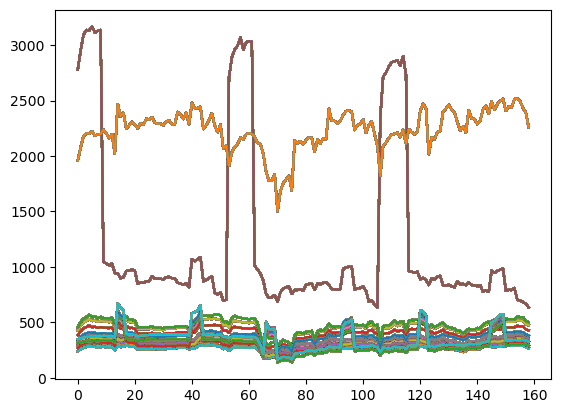

CPU times: total: 3.36 s
Wall time: 3.59 s


In [174]:
%%time

quantile = train['emission'].quantile(0.95)

import matplotlib.pyplot as plt

for location in train.loc[train['Location_enc'] > quantile, 'Location_enc']:
    series = train.loc[train['Location_enc'] == location, 'emission']
    plt.plot(range(len(series)), series)
plt.show()

We can see a few things here:

-) There seems to be a common trend

-) Sesonality is similar for most of the locations, except for the two with the highest emissions.

## 05. Common trend

Let's look at the median emissions time series across all locations:

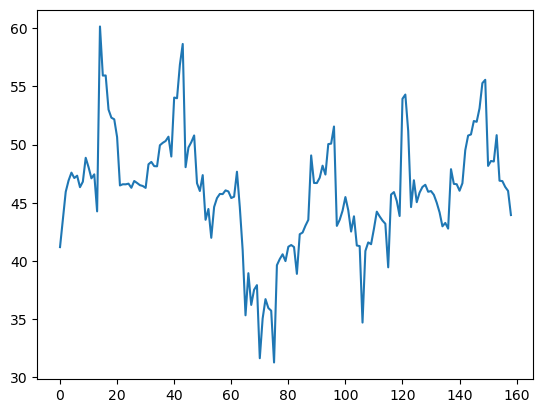

In [175]:
study_number = '05'

plt.plot(range(159), train.groupby('WeekCount')['emission'].median())
plt.show()

Let't calculate a common trend:

In [176]:
%%time

from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.linear_model import LinearRegression

# Calculate trend on the training set
dp = DeterministicProcess(index=range(159), constant=True, order=1, drop=True)
X = dp.in_sample()
y = train.groupby('WeekCount')['emission'].median()

lr = LinearRegression(fit_intercept=False)
lr.fit(X, y)

y_pred = pd.Series(lr.predict(X), index=X.index)

train['CommonTrend'] = train['WeekCount'].map(y_pred)

# Continue trend on the test set:

X = dp.out_of_sample(steps=49)

y_pred = pd.Series(lr.predict(X), index=X.index)

test['CommonTrend'] = test['WeekCount'].map(y_pred)

CPU times: total: 0 ns
Wall time: 24.1 ms


Let's look at the trend:

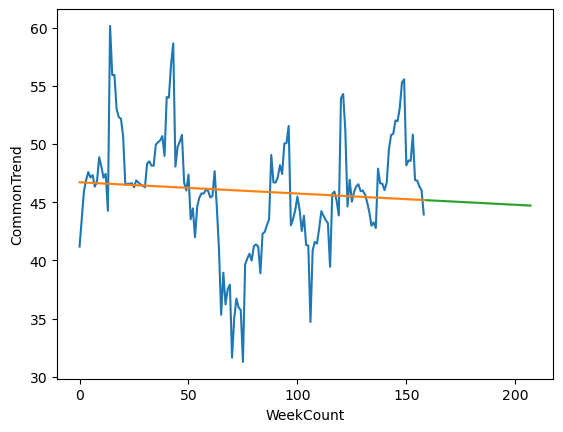

CPU times: total: 5.59 s
Wall time: 5.83 s


In [177]:
%%time

import seaborn as sns
ax = plt.plot(range(159), train.groupby('WeekCount')['emission'].median())
sns.lineplot(data = train, x='WeekCount', y='CommonTrend')
sns.lineplot(data = test, x='WeekCount', y='CommonTrend')

plt.show()

Now, let's see if adding CommonTrend improves our results:

In [178]:
%%time

selected_columns.append('CommonTrend')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train_unprocessed['emission']], axis=1)
test_selected =  test[selected_columns]

# Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_selected, test_selected,
                                                                   model, scores_df,
                                                                  comment="3 + CommonTrend")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 4.53 s
Wall time: 1.5 s


In [184]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df.to_csv('scores_df.csv')
scores_df

,Comment,Train Score,Cross-val Score,Test RMSE
0,Just average,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,72.130730,227.100652,92.71815
2,Only important features,72.122560,227.045528,NaN
3,Location_enc,55.644217,144.222814,75.18105
4,+ WeekCount,55.431507,144.226023,NaN
5,+ CommonTrend,55.431507,144.228230,NaN


Nope, it didn't.

In [185]:
selected_columns.remove('CommonTrend')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train_unprocessed['emission']], axis=1)
test_selected =  test[selected_columns]

## 06. Linear trend.

Let's calculate a linear trend for each location:

In [186]:
%%time

study_number = '06'

from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.linear_model import LinearRegression

for location in train['Location'].unique():
    # Calculate trend on the training set
    dp = DeterministicProcess(index=train[train['Location'] == location].index, constant=True, order=1, drop=True)
    X = dp.in_sample()
    y = train.loc[train['Location'] == location, 'emission']

    lr = LinearRegression(fit_intercept=False)
    lr.fit(X, y)

    y_pred = pd.Series(lr.predict(X), index=X.index)
    
    train.loc[y_pred.index, 'Trend'] = y_pred
    
    # Continue trend on the test set:
    X = dp.out_of_sample(steps=49)
    
    y_pred = pd.Series(lr.predict(X), index=test[test['Location'] == location].index)
    
    test.loc[y_pred.index, 'Trend'] = y_pred



C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.


C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.


C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.


C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.


C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.


C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.


C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.


C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.


C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.


C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.


C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.


C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.


C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.


C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.


C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.


C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.


C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.


C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.


CPU times: total: 41.4 s
Wall time: 12 s


C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\mikej\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.


Let's look at the trend example for one of the locations:

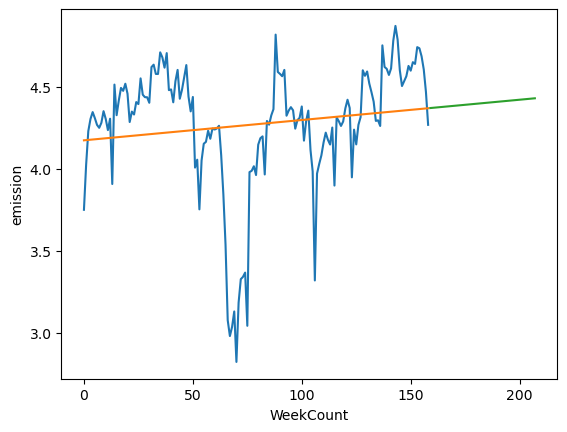

In [195]:
%%time

sns.lineplot(data = train[train['Location'] == '-0.5129.29'], x='WeekCount', y='emission')
sns.lineplot(data = train[train['Location'] == '-0.5129.29'], x='WeekCount', y='Trend')
sns.lineplot(data = test[test['Location'] == '-0.5129.29'], x='WeekCount', y='Trend')
plt.show()

Now, let's see if adding CommonTrend improves our results:

In [196]:
%%time

selected_columns.append('Trend')

train_selected = train[selected_columns]
train_selected = pd.concat([train_selected, train_unprocessed['emission']], axis=1)
test_selected =  test[selected_columns]

# Calculate scores
train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_selected, test_selected,
                                                                   model, scores_df,
                                                                  comment="3 + Trend")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 3.62 s
Wall time: 369 ms


In [198]:
scores_df.loc[int(study_number), 'Test RMSE'] = np.nan
scores_df.to_csv('scores_df.csv')
scores_df

,Comment,Train Score,Cross-val Score,Test RMSE
0,Just average,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,72.130730,227.100652,92.71815
2,Only important features,72.122560,227.045528,NaN
3,Location_enc,55.644217,144.222814,75.18105
4,+ WeekCount,55.431507,144.226023,NaN
5,+ CommonTrend,55.431507,144.228230,NaN
6,3 + Trend,55.257622,143.733902,NaN


We have a small improvement, so Trend stays.